# Computer Vision : Sign Language Digit Recognizer 
# Transfer learning with VGG16 model

[Liens](https://openclassrooms.com/fr/courses/4470531-classez-et-segmentez-des-donnees-visuelles/5097666-tp-implementez-votre-premier-reseau-de-neurones-avec-keras) 

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA


import seaborn as sns
%config InlineBackend.figure_format = 'retina'

# Sign language digits dataset from Kaggle

Data available on [Kaggle](https://www.kaggle.com/ardamavi/sign-language-digits-dataset)

In [2]:

X = np.load('X.npy')
Y = np.load('Y.npy')

print(X.shape)
print(Y.shape)


(2062, 64, 64)
(2062, 10)


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


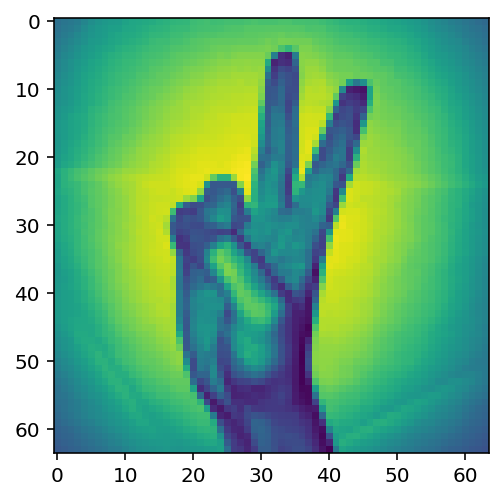

In [3]:
a = 1649
plt.imshow(X[a])
print(Y[a])

In [51]:
truc = Y[np.where(Y[:,4]==1)]
truc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
truc = np.nonzero(Y[:,4]==1)
truc

(array([ 822,  823,  824,  825,  826,  827,  828,  829,  830,  831,  832,
         833,  834,  835,  836,  837,  838,  839,  840,  841,  842,  843,
         844,  845,  846,  847,  848,  849,  850,  851,  852,  853,  854,
         855,  856,  857,  858,  859,  860,  861,  862,  863,  864,  865,
         866,  867,  868,  869,  870,  871,  872,  873,  874,  875,  876,
         877,  878,  879,  880,  881,  882,  883,  884,  885,  886,  887,
         888,  889,  890,  891,  892,  893,  894,  895,  896,  897,  898,
         899,  900,  901,  902,  903,  904,  905,  906,  907,  908,  909,
         910,  911,  912,  913,  914,  915,  916,  917,  918,  919,  920,
         921,  922,  923,  924,  925,  926,  927,  928,  929,  930,  931,
         932,  933,  934,  935,  936,  937,  938,  939,  940,  941,  942,
         943,  944,  945,  946,  947,  948,  949,  950,  951,  952,  953,
         954,  955,  956,  957,  958,  959,  960,  961,  962,  963,  964,
         965,  966,  967,  968,  969, 

In [6]:
#X_flat = np.array(X).reshape((2062, 64*64))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
#check image shape here
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(1649, 64, 64)
(1649, 10)
(413, 64, 64)
(413, 10)


In [8]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

#one-hot encode target column
X_train = np.broadcast_to(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))
X_test = np.broadcast_to(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))
print(X_train.shape)
print(X_test.shape)

(1649, 64, 64, 3)
(413, 64, 64, 3)


# Simple model with 1 Dense at the end

## Model VGG16

In [9]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

Using TensorFlow backend.


In [10]:
## Ne pas entraîner les 19 premières couches
for layers in (vggmodel.layers)[:19]:
    layers.trainable = False

In [11]:
new_X_train = vggmodel.predict(X_train)
new_X_test = vggmodel.predict(X_test)

In [12]:
new_X_train.shape


(1649, 2, 2, 512)

##  Additional model

In [13]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras import optimizers

model_final = Sequential()
model_final.add(Flatten(input_shape=(2, 2, 512)))
model_final.add(Dense(10, activation="softmax"))

In [14]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model_final.fit(x=new_X_train, y=y_train, epochs= 1000, validation_data= (new_X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1649 samples, validate on 413 samples
Epoch 1/1000
1649/1649 [==============================] - 0s 241us/step - loss: 2.3710 - acc: 0.0976 - val_loss: 2.3079 - val_acc: 0.1090
Epoch 2/1000
1649/1649 [==============================] - 0s 53us/step - loss: 2.2561 - acc: 0.1437 - val_loss: 2.2500 - val_acc: 0.1525
Epoch 3/1000
1649/1649 [==============================] - 0s 53us/step - loss: 2.1958 - acc: 0.2116 - val_loss: 2.1823 - val_acc: 0.2034
Epoch 4/1000
1649/1649 [==============================] - 0s 53us/step - loss: 2.1384 - acc: 0.2899 - val_loss: 2.1313 - val_acc: 0.2881
Epoch 5/1000
1649/1649 [==============================] - 0s 54us/step - loss: 2.0823 - acc: 0.3481 - val_loss: 2.0780 - val_acc: 0.3366
Epoch 6/1000
1649/1649 [==============================] - 0s 55us/step - loss: 2.0300 - acc: 0.4106 - val_loss: 2.0333 - val_acc: 0.3729
Epoch 7/1000
1649/1649 [==========

1649/1649 [==============================] - 0s 53us/step - loss: 1.0784 - acc: 0.7793 - val_loss: 1.1233 - val_acc: 0.7143
Epoch 55/1000
1649/1649 [==============================] - 0s 52us/step - loss: 1.0709 - acc: 0.7793 - val_loss: 1.1124 - val_acc: 0.7288
Epoch 56/1000
1649/1649 [==============================] - 0s 51us/step - loss: 1.0628 - acc: 0.7884 - val_loss: 1.1115 - val_acc: 0.7119
Epoch 57/1000
1649/1649 [==============================] - 0s 52us/step - loss: 1.0556 - acc: 0.7805 - val_loss: 1.0996 - val_acc: 0.7215
Epoch 58/1000
1649/1649 [==============================] - 0s 52us/step - loss: 1.0487 - acc: 0.7829 - val_loss: 1.0954 - val_acc: 0.7337
Epoch 59/1000
1649/1649 [==============================] - 0s 52us/step - loss: 1.0407 - acc: 0.7847 - val_loss: 1.0870 - val_acc: 0.7312
Epoch 60/1000
1649/1649 [==============================] - 0s 52us/step - loss: 1.0349 - acc: 0.7847 - val_loss: 1.0781 - val_acc: 0.7409
Epoch 61/1000
1649/1649 [=======================

1649/1649 [==============================] - 0s 61us/step - loss: 0.7967 - acc: 0.8314 - val_loss: 0.8486 - val_acc: 0.7797
Epoch 114/1000
1649/1649 [==============================] - 0s 61us/step - loss: 0.7943 - acc: 0.8223 - val_loss: 0.8466 - val_acc: 0.7797
Epoch 115/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.7910 - acc: 0.8235 - val_loss: 0.8424 - val_acc: 0.7869
Epoch 116/1000
1649/1649 [==============================] - 0s 62us/step - loss: 0.7881 - acc: 0.8235 - val_loss: 0.8386 - val_acc: 0.7845
Epoch 117/1000
1649/1649 [==============================] - 0s 61us/step - loss: 0.7854 - acc: 0.8284 - val_loss: 0.8360 - val_acc: 0.7797
Epoch 118/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.7825 - acc: 0.8338 - val_loss: 0.8349 - val_acc: 0.7748
Epoch 119/1000
1649/1649 [==============================] - 0s 65us/step - loss: 0.7797 - acc: 0.8272 - val_loss: 0.8297 - val_acc: 0.7918
Epoch 120/1000
1649/1649 [================

1649/1649 [==============================] - 0s 58us/step - loss: 0.6663 - acc: 0.8417 - val_loss: 0.7165 - val_acc: 0.8039
Epoch 173/1000
1649/1649 [==============================] - 0s 56us/step - loss: 0.6643 - acc: 0.8484 - val_loss: 0.7180 - val_acc: 0.8111
Epoch 174/1000
1649/1649 [==============================] - 0s 55us/step - loss: 0.6625 - acc: 0.8448 - val_loss: 0.7135 - val_acc: 0.8015
Epoch 175/1000
1649/1649 [==============================] - 0s 55us/step - loss: 0.6610 - acc: 0.8508 - val_loss: 0.7125 - val_acc: 0.8039
Epoch 176/1000
1649/1649 [==============================] - 0s 54us/step - loss: 0.6587 - acc: 0.8478 - val_loss: 0.7113 - val_acc: 0.8087
Epoch 177/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.6576 - acc: 0.8539 - val_loss: 0.7106 - val_acc: 0.8136
Epoch 178/1000
1649/1649 [==============================] - 0s 54us/step - loss: 0.6567 - acc: 0.8496 - val_loss: 0.7056 - val_acc: 0.8111
Epoch 179/1000
1649/1649 [================

1649/1649 [==============================] - 0s 53us/step - loss: 0.5861 - acc: 0.8696 - val_loss: 0.6374 - val_acc: 0.8354
Epoch 232/1000
1649/1649 [==============================] - 0s 53us/step - loss: 0.5855 - acc: 0.8648 - val_loss: 0.6358 - val_acc: 0.8329
Epoch 233/1000
1649/1649 [==============================] - 0s 53us/step - loss: 0.5835 - acc: 0.8690 - val_loss: 0.6342 - val_acc: 0.8402
Epoch 234/1000
1649/1649 [==============================] - 0s 61us/step - loss: 0.5823 - acc: 0.8702 - val_loss: 0.6344 - val_acc: 0.8402
Epoch 235/1000
1649/1649 [==============================] - 0s 54us/step - loss: 0.5808 - acc: 0.8696 - val_loss: 0.6327 - val_acc: 0.8378
Epoch 236/1000
1649/1649 [==============================] - 0s 53us/step - loss: 0.5803 - acc: 0.8690 - val_loss: 0.6331 - val_acc: 0.8354
Epoch 237/1000
1649/1649 [==============================] - 0s 53us/step - loss: 0.5806 - acc: 0.8678 - val_loss: 0.6326 - val_acc: 0.8354
Epoch 238/1000
1649/1649 [================

1649/1649 [==============================] - 0s 61us/step - loss: 0.5303 - acc: 0.8817 - val_loss: 0.5822 - val_acc: 0.8620
Epoch 291/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.5290 - acc: 0.8787 - val_loss: 0.5818 - val_acc: 0.8644
Epoch 292/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.5288 - acc: 0.8787 - val_loss: 0.5814 - val_acc: 0.8571
Epoch 293/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.5279 - acc: 0.8787 - val_loss: 0.5782 - val_acc: 0.8644
Epoch 294/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.5273 - acc: 0.8824 - val_loss: 0.5776 - val_acc: 0.8692
Epoch 295/1000
1649/1649 [==============================] - 0s 54us/step - loss: 0.5259 - acc: 0.8824 - val_loss: 0.5760 - val_acc: 0.8644
Epoch 296/1000
1649/1649 [==============================] - 0s 52us/step - loss: 0.5253 - acc: 0.8799 - val_loss: 0.5771 - val_acc: 0.8571
Epoch 297/1000
1649/1649 [================

Epoch 349/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.4886 - acc: 0.8848 - val_loss: 0.5404 - val_acc: 0.8765
Epoch 350/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.4876 - acc: 0.8878 - val_loss: 0.5401 - val_acc: 0.8741
Epoch 351/1000
1649/1649 [==============================] - 0s 62us/step - loss: 0.4869 - acc: 0.8896 - val_loss: 0.5392 - val_acc: 0.8717
Epoch 352/1000
1649/1649 [==============================] - 0s 62us/step - loss: 0.4865 - acc: 0.8884 - val_loss: 0.5378 - val_acc: 0.8717
Epoch 353/1000
1649/1649 [==============================] - 0s 64us/step - loss: 0.4855 - acc: 0.8890 - val_loss: 0.5380 - val_acc: 0.8717
Epoch 354/1000
1649/1649 [==============================] - 0s 63us/step - loss: 0.4851 - acc: 0.8902 - val_loss: 0.5389 - val_acc: 0.8692
Epoch 355/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.4844 - acc: 0.8908 - val_loss: 0.5368 - val_acc: 0.8717
Epoch 356/1000
1649/1649 [=

Epoch 408/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.4552 - acc: 0.8957 - val_loss: 0.5086 - val_acc: 0.8789
Epoch 409/1000
1649/1649 [==============================] - 0s 63us/step - loss: 0.4547 - acc: 0.8945 - val_loss: 0.5096 - val_acc: 0.8814
Epoch 410/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.4550 - acc: 0.8945 - val_loss: 0.5073 - val_acc: 0.8789
Epoch 411/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.4536 - acc: 0.8957 - val_loss: 0.5079 - val_acc: 0.8814
Epoch 412/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.4531 - acc: 0.8957 - val_loss: 0.5070 - val_acc: 0.8814
Epoch 413/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.4526 - acc: 0.8981 - val_loss: 0.5064 - val_acc: 0.8814
Epoch 414/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.4524 - acc: 0.8957 - val_loss: 0.5042 - val_acc: 0.8789
Epoch 415/1000
1649/1649 [=

1649/1649 [==============================] - 0s 67us/step - loss: 0.4292 - acc: 0.9018 - val_loss: 0.4823 - val_acc: 0.8838
Epoch 467/1000
1649/1649 [==============================] - 0s 55us/step - loss: 0.4283 - acc: 0.9018 - val_loss: 0.4819 - val_acc: 0.8814
Epoch 468/1000
1649/1649 [==============================] - 0s 57us/step - loss: 0.4279 - acc: 0.9012 - val_loss: 0.4832 - val_acc: 0.8838
Epoch 469/1000
1649/1649 [==============================] - 0s 55us/step - loss: 0.4276 - acc: 0.9005 - val_loss: 0.4817 - val_acc: 0.8814
Epoch 470/1000
1649/1649 [==============================] - 0s 55us/step - loss: 0.4270 - acc: 0.9018 - val_loss: 0.4804 - val_acc: 0.8886
Epoch 471/1000
1649/1649 [==============================] - 0s 55us/step - loss: 0.4265 - acc: 0.9024 - val_loss: 0.4809 - val_acc: 0.8838
Epoch 472/1000
1649/1649 [==============================] - 0s 55us/step - loss: 0.4259 - acc: 0.9005 - val_loss: 0.4803 - val_acc: 0.8838
Epoch 473/1000
1649/1649 [================

Epoch 525/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.4064 - acc: 0.9090 - val_loss: 0.4603 - val_acc: 0.8886
Epoch 526/1000
1649/1649 [==============================] - 0s 57us/step - loss: 0.4061 - acc: 0.9102 - val_loss: 0.4605 - val_acc: 0.8862
Epoch 527/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.4054 - acc: 0.9054 - val_loss: 0.4594 - val_acc: 0.8935
Epoch 528/1000
1649/1649 [==============================] - 0s 62us/step - loss: 0.4054 - acc: 0.9084 - val_loss: 0.4590 - val_acc: 0.8935
Epoch 529/1000
1649/1649 [==============================] - 0s 61us/step - loss: 0.4049 - acc: 0.9078 - val_loss: 0.4598 - val_acc: 0.8935
Epoch 530/1000
1649/1649 [==============================] - 0s 62us/step - loss: 0.4043 - acc: 0.9060 - val_loss: 0.4604 - val_acc: 0.8862
Epoch 531/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.4042 - acc: 0.9090 - val_loss: 0.4605 - val_acc: 0.8862
Epoch 532/1000
1649/1649 [=

Epoch 584/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.3870 - acc: 0.9115 - val_loss: 0.4423 - val_acc: 0.8935
Epoch 585/1000
1649/1649 [==============================] - 0s 60us/step - loss: 0.3866 - acc: 0.9121 - val_loss: 0.4425 - val_acc: 0.8935
Epoch 586/1000
1649/1649 [==============================] - 0s 60us/step - loss: 0.3864 - acc: 0.9121 - val_loss: 0.4407 - val_acc: 0.8959
Epoch 587/1000
1649/1649 [==============================] - 0s 61us/step - loss: 0.3861 - acc: 0.9151 - val_loss: 0.4409 - val_acc: 0.8935
Epoch 588/1000
1649/1649 [==============================] - 0s 62us/step - loss: 0.3859 - acc: 0.9121 - val_loss: 0.4414 - val_acc: 0.8959
Epoch 589/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.3856 - acc: 0.9127 - val_loss: 0.4412 - val_acc: 0.8959
Epoch 590/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.3852 - acc: 0.9139 - val_loss: 0.4399 - val_acc: 0.8935
Epoch 591/1000
1649/1649 [=

Epoch 643/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.3701 - acc: 0.9169 - val_loss: 0.4266 - val_acc: 0.8959
Epoch 644/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.3697 - acc: 0.9163 - val_loss: 0.4250 - val_acc: 0.8983
Epoch 645/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.3695 - acc: 0.9151 - val_loss: 0.4245 - val_acc: 0.8959
Epoch 646/1000
1649/1649 [==============================] - 0s 63us/step - loss: 0.3695 - acc: 0.9157 - val_loss: 0.4247 - val_acc: 0.8935
Epoch 647/1000
1649/1649 [==============================] - 0s 60us/step - loss: 0.3685 - acc: 0.9157 - val_loss: 0.4246 - val_acc: 0.8983
Epoch 648/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.3689 - acc: 0.9181 - val_loss: 0.4248 - val_acc: 0.8959
Epoch 649/1000
1649/1649 [==============================] - 0s 57us/step - loss: 0.3689 - acc: 0.9175 - val_loss: 0.4236 - val_acc: 0.8983
Epoch 650/1000
1649/1649 [=

Epoch 702/1000
1649/1649 [==============================] - 0s 57us/step - loss: 0.3550 - acc: 0.9181 - val_loss: 0.4123 - val_acc: 0.9007
Epoch 703/1000
1649/1649 [==============================] - 0s 60us/step - loss: 0.3546 - acc: 0.9175 - val_loss: 0.4107 - val_acc: 0.8935
Epoch 704/1000
1649/1649 [==============================] - 0s 61us/step - loss: 0.3545 - acc: 0.9187 - val_loss: 0.4110 - val_acc: 0.8935
Epoch 705/1000
1649/1649 [==============================] - 0s 57us/step - loss: 0.3544 - acc: 0.9206 - val_loss: 0.4132 - val_acc: 0.8959
Epoch 706/1000
1649/1649 [==============================] - 0s 61us/step - loss: 0.3541 - acc: 0.9193 - val_loss: 0.4099 - val_acc: 0.8959
Epoch 707/1000
1649/1649 [==============================] - 0s 60us/step - loss: 0.3535 - acc: 0.9200 - val_loss: 0.4110 - val_acc: 0.8959
Epoch 708/1000
1649/1649 [==============================] - 0s 57us/step - loss: 0.3538 - acc: 0.9193 - val_loss: 0.4110 - val_acc: 0.8983
Epoch 709/1000
1649/1649 [=

1649/1649 [==============================] - 0s 60us/step - loss: 0.3421 - acc: 0.9236 - val_loss: 0.4000 - val_acc: 0.8983
Epoch 761/1000
1649/1649 [==============================] - 0s 57us/step - loss: 0.3413 - acc: 0.9212 - val_loss: 0.3996 - val_acc: 0.8983
Epoch 762/1000
1649/1649 [==============================] - 0s 57us/step - loss: 0.3413 - acc: 0.9224 - val_loss: 0.3997 - val_acc: 0.8983
Epoch 763/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.3410 - acc: 0.9200 - val_loss: 0.3981 - val_acc: 0.8983
Epoch 764/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.3412 - acc: 0.9218 - val_loss: 0.3994 - val_acc: 0.8983
Epoch 765/1000
1649/1649 [==============================] - 0s 60us/step - loss: 0.3408 - acc: 0.9212 - val_loss: 0.3972 - val_acc: 0.8959
Epoch 766/1000
1649/1649 [==============================] - 0s 61us/step - loss: 0.3404 - acc: 0.9218 - val_loss: 0.3981 - val_acc: 0.8983
Epoch 767/1000
1649/1649 [================

1649/1649 [==============================] - 0s 57us/step - loss: 0.3297 - acc: 0.9266 - val_loss: 0.3877 - val_acc: 0.8983
Epoch 820/1000
1649/1649 [==============================] - 0s 57us/step - loss: 0.3296 - acc: 0.9242 - val_loss: 0.3884 - val_acc: 0.8983
Epoch 821/1000
1649/1649 [==============================] - 0s 56us/step - loss: 0.3294 - acc: 0.9266 - val_loss: 0.3881 - val_acc: 0.8983
Epoch 822/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.3297 - acc: 0.9254 - val_loss: 0.3870 - val_acc: 0.9007
Epoch 823/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.3295 - acc: 0.9272 - val_loss: 0.3884 - val_acc: 0.8983
Epoch 824/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.3289 - acc: 0.9248 - val_loss: 0.3879 - val_acc: 0.8983
Epoch 825/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.3286 - acc: 0.9254 - val_loss: 0.3882 - val_acc: 0.8983
Epoch 826/1000
1649/1649 [================

1649/1649 [==============================] - 0s 58us/step - loss: 0.3187 - acc: 0.9290 - val_loss: 0.3777 - val_acc: 0.9007
Epoch 879/1000
1649/1649 [==============================] - 0s 59us/step - loss: 0.3186 - acc: 0.9315 - val_loss: 0.3784 - val_acc: 0.8983
Epoch 880/1000
1649/1649 [==============================] - 0s 60us/step - loss: 0.3183 - acc: 0.9297 - val_loss: 0.3782 - val_acc: 0.9007
Epoch 881/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.3185 - acc: 0.9303 - val_loss: 0.3786 - val_acc: 0.9007
Epoch 882/1000
1649/1649 [==============================] - 0s 58us/step - loss: 0.3186 - acc: 0.9297 - val_loss: 0.3767 - val_acc: 0.9007
Epoch 883/1000
1649/1649 [==============================] - 0s 73us/step - loss: 0.3180 - acc: 0.9297 - val_loss: 0.3786 - val_acc: 0.9007
Epoch 884/1000
1649/1649 [==============================] - 0s 64us/step - loss: 0.3179 - acc: 0.9315 - val_loss: 0.3777 - val_acc: 0.8983
Epoch 885/1000
1649/1649 [================

1649/1649 [==============================] - 0s 87us/step - loss: 0.3090 - acc: 0.9309 - val_loss: 0.3692 - val_acc: 0.9007
Epoch 938/1000
1649/1649 [==============================] - 0s 70us/step - loss: 0.3091 - acc: 0.9339 - val_loss: 0.3697 - val_acc: 0.8983
Epoch 939/1000
1649/1649 [==============================] - 0s 62us/step - loss: 0.3091 - acc: 0.9297 - val_loss: 0.3679 - val_acc: 0.9007
Epoch 940/1000
1649/1649 [==============================] - 0s 65us/step - loss: 0.3085 - acc: 0.9333 - val_loss: 0.3694 - val_acc: 0.9007
Epoch 941/1000
1649/1649 [==============================] - 0s 119us/step - loss: 0.3082 - acc: 0.9327 - val_loss: 0.3676 - val_acc: 0.9007
Epoch 942/1000
1649/1649 [==============================] - 0s 74us/step - loss: 0.3080 - acc: 0.9339 - val_loss: 0.3679 - val_acc: 0.9007
Epoch 943/1000
1649/1649 [==============================] - 0s 65us/step - loss: 0.3080 - acc: 0.9339 - val_loss: 0.3686 - val_acc: 0.9007
Epoch 944/1000
1649/1649 [===============

1649/1649 [==============================] - 0s 59us/step - loss: 0.2996 - acc: 0.9363 - val_loss: 0.3602 - val_acc: 0.9007
Epoch 997/1000
1649/1649 [==============================] - 0s 62us/step - loss: 0.2997 - acc: 0.9357 - val_loss: 0.3613 - val_acc: 0.9056
Epoch 998/1000
1649/1649 [==============================] - 0s 62us/step - loss: 0.2994 - acc: 0.9327 - val_loss: 0.3608 - val_acc: 0.9031
Epoch 999/1000
1649/1649 [==============================] - 0s 61us/step - loss: 0.2997 - acc: 0.9369 - val_loss: 0.3612 - val_acc: 0.9056
Epoch 1000/1000
1649/1649 [==============================] - 0s 63us/step - loss: 0.2998 - acc: 0.9309 - val_loss: 0.3583 - val_acc: 0.9007


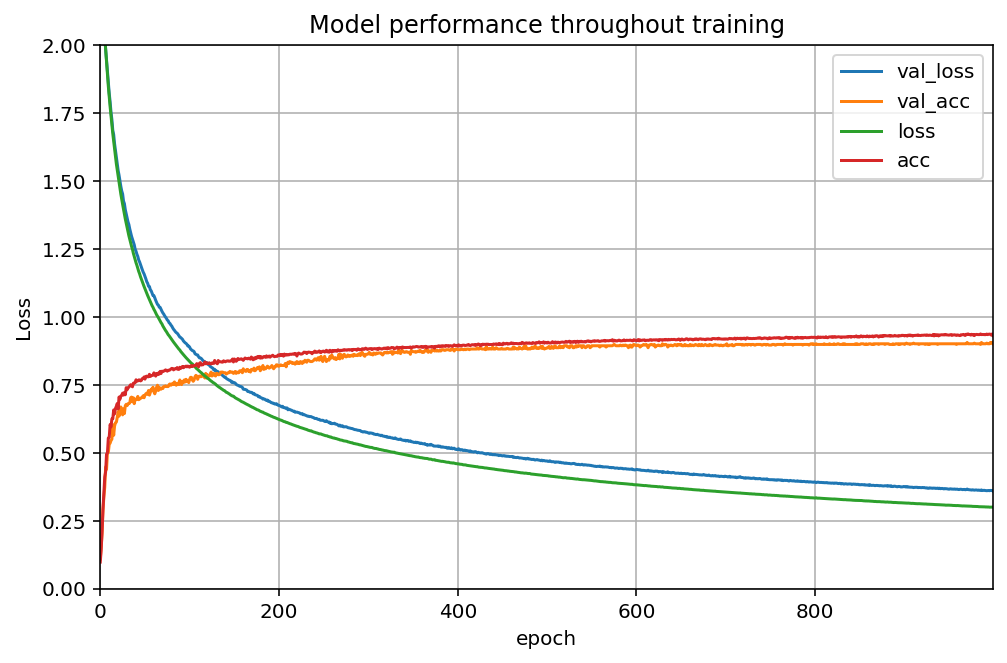

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylim(0,2)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Accuracy

In [17]:
y_predict = model_final.predict(new_X_train)
print(y_predict.shape)
print(y_train.shape)
y_predict

(1649, 10)
(1649, 10)


array([[2.58979443e-02, 2.83973321e-04, 1.99466601e-01, ...,
        1.66392364e-02, 5.97852655e-03, 9.99749638e-03],
       [5.24490792e-03, 2.91044526e-05, 6.43117295e-04, ...,
        5.59449336e-03, 2.14115880e-06, 9.86030579e-01],
       [2.90849502e-03, 4.57773422e-05, 9.32969451e-02, ...,
        8.51663295e-03, 2.37157149e-03, 1.25195645e-02],
       ...,
       [9.75500196e-02, 8.07168020e-04, 6.36910558e-01, ...,
        1.06962468e-03, 4.12735064e-03, 3.88362724e-03],
       [2.20316695e-03, 1.83277734e-04, 1.99862616e-03, ...,
        9.92630521e-06, 1.73209666e-03, 3.21130967e-04],
       [3.56214179e-04, 2.22548315e-05, 3.31607065e-04, ...,
        6.35136943e-03, 2.96660494e-02, 8.84592828e-06]], dtype=float32)

In [18]:
y_predict2 = np.argmax(y_predict, axis = 1)
y_predict2

array([5, 9, 6, ..., 2, 6, 4], dtype=int64)

In [19]:
from keras.utils import np_utils
y_predict3 =  np_utils.to_categorical(y_predict2, num_classes=10, dtype='float32')
y_predict3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
y_predict3.shape

(1649, 10)

In [21]:
accuracy_train = accuracy_score(y_train,y_predict3)
print(accuracy_train)

0.9381443298969072


In [22]:
y_test_predict = model_final.predict(new_X_test)
y_test_predict = np.argmax(y_test_predict, axis = 1)
y_test_predict =  np_utils.to_categorical(y_test_predict, num_classes=10, dtype='float32')
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.9007263922518159


## Prediction 

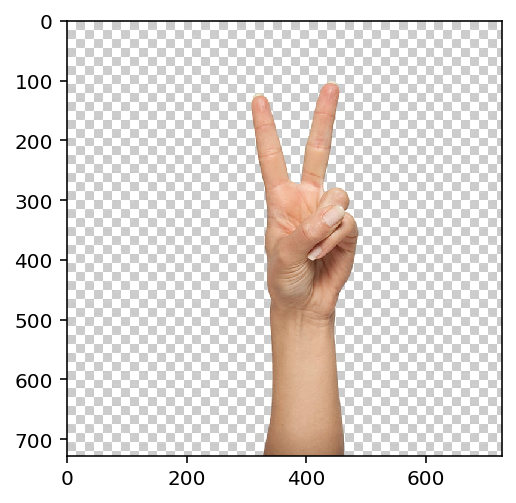

In [23]:
from keras.preprocessing import image
#img = image.load_img("prev1.jpg",target_size=(224,224))
img = image.load_img("prev1.jpg")
img = np.asarray(img)
plt.imshow(img)

In [24]:
img.shape

(728, 728, 3)

In [25]:
import cv2
img2 = cv2.imread('prev1.jpg')
img2  = cv2.resize(img2,dsize=(64,64))
img2.shape


(64, 64, 3)

In [26]:
img2 = img2.reshape(1,img2.shape[0],img2.shape[1],img2.shape[2])
img2_predict0 = vggmodel.predict(img2)
img2_predict = model_final.predict(img2_predict0)
# if output[0][0] > output[0][1]:
#    print("cat")
# else:
#    print('dog')

In [27]:
img2_predict = np.argmax(img2_predict, axis = 1)
img2_predict

array([8], dtype=int64)

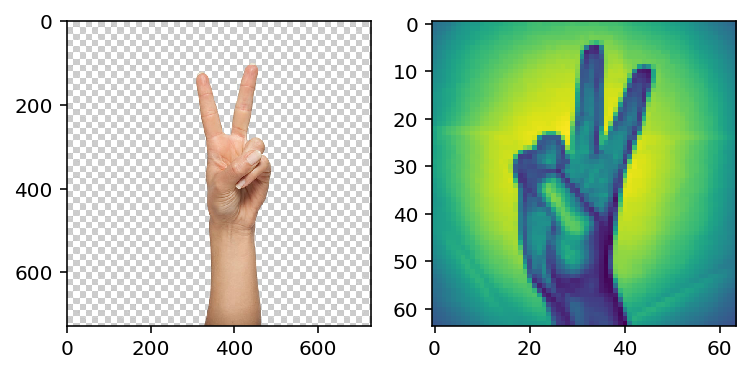

In [28]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[1].imshow(X[1649])

# Simple model with 1 Dense + 1 dropout

In [29]:
new_X_train = vggmodel.predict(X_train)
new_X_test = vggmodel.predict(X_test)

## Additional model

In [30]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras import optimizers

model_final = Sequential()
model_final.add(Flatten(input_shape=(2, 2, 512)))
model_final.add(Dropout(0.5))
model_final.add(Dense(10, activation="softmax"))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [31]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model_final.fit(x=new_X_train, y=y_train, epochs= 1000, validation_data= (new_X_test, y_test))

Train on 1649 samples, validate on 413 samples
Epoch 1/1000
1649/1649 [==============================] - 0s 297us/step - loss: 2.6231 - acc: 0.0879 - val_loss: 2.3551 - val_acc: 0.0654
Epoch 2/1000
1649/1649 [==============================] - 0s 75us/step - loss: 2.4766 - acc: 0.0988 - val_loss: 2.2869 - val_acc: 0.0920
Epoch 3/1000
1649/1649 [==============================] - 0s 82us/step - loss: 2.3759 - acc: 0.1371 - val_loss: 2.2212 - val_acc: 0.1719
Epoch 4/1000
1649/1649 [==============================] - 0s 75us/step - loss: 2.3295 - acc: 0.1431 - val_loss: 2.1711 - val_acc: 0.2082
Epoch 5/1000
1649/1649 [==============================] - 0s 73us/step - loss: 2.2362 - acc: 0.1686 - val_loss: 2.1148 - val_acc: 0.2881
Epoch 6/1000
1649/1649 [==============================] - 0s 75us/step - loss: 2.1850 - acc: 0.2019 - val_loss: 2.0571 - val_acc: 0.3874
Epoch 7/1000
1649/1649 [==============================] - 0s 77us/step - loss: 2.1494 - acc: 0.2207 - val_loss: 2.0129 - val_acc: 

1649/1649 [==============================] - 0s 75us/step - loss: 1.1727 - acc: 0.6671 - val_loss: 1.1178 - val_acc: 0.7094
Epoch 61/1000
1649/1649 [==============================] - 0s 75us/step - loss: 1.1655 - acc: 0.6598 - val_loss: 1.1136 - val_acc: 0.7240
Epoch 62/1000
1649/1649 [==============================] - 0s 81us/step - loss: 1.1668 - acc: 0.6586 - val_loss: 1.1050 - val_acc: 0.7119
Epoch 63/1000
1649/1649 [==============================] - 0s 72us/step - loss: 1.1758 - acc: 0.6543 - val_loss: 1.1032 - val_acc: 0.7191
Epoch 64/1000
1649/1649 [==============================] - 0s 69us/step - loss: 1.1528 - acc: 0.6501 - val_loss: 1.0926 - val_acc: 0.7167
Epoch 65/1000
1649/1649 [==============================] - 0s 73us/step - loss: 1.1554 - acc: 0.6634 - val_loss: 1.0926 - val_acc: 0.7264
Epoch 66/1000
1649/1649 [==============================] - 0s 85us/step - loss: 1.1500 - acc: 0.6537 - val_loss: 1.0884 - val_acc: 0.7143
Epoch 67/1000
1649/1649 [=======================

1649/1649 [==============================] - 0s 76us/step - loss: 0.9500 - acc: 0.7126 - val_loss: 0.8753 - val_acc: 0.7772
Epoch 120/1000
1649/1649 [==============================] - 0s 78us/step - loss: 0.9525 - acc: 0.7180 - val_loss: 0.8739 - val_acc: 0.7772
Epoch 121/1000
1649/1649 [==============================] - 0s 74us/step - loss: 0.9534 - acc: 0.7174 - val_loss: 0.8745 - val_acc: 0.7748
Epoch 122/1000
1649/1649 [==============================] - 0s 78us/step - loss: 0.9062 - acc: 0.7435 - val_loss: 0.8689 - val_acc: 0.7748
Epoch 123/1000
1649/1649 [==============================] - 0s 70us/step - loss: 0.9232 - acc: 0.7423 - val_loss: 0.8694 - val_acc: 0.7651
Epoch 124/1000
1649/1649 [==============================] - 0s 73us/step - loss: 0.9314 - acc: 0.7253 - val_loss: 0.8634 - val_acc: 0.7821
Epoch 125/1000
1649/1649 [==============================] - 0s 78us/step - loss: 0.9302 - acc: 0.7344 - val_loss: 0.8639 - val_acc: 0.7772
Epoch 126/1000
1649/1649 [================

1649/1649 [==============================] - 0s 70us/step - loss: 0.8181 - acc: 0.7635 - val_loss: 0.7611 - val_acc: 0.8039
Epoch 179/1000
1649/1649 [==============================] - 0s 72us/step - loss: 0.8123 - acc: 0.7605 - val_loss: 0.7601 - val_acc: 0.8039
Epoch 180/1000
1649/1649 [==============================] - 0s 79us/step - loss: 0.8399 - acc: 0.7489 - val_loss: 0.7560 - val_acc: 0.7990
Epoch 181/1000
1649/1649 [==============================] - 0s 78us/step - loss: 0.8207 - acc: 0.7586 - val_loss: 0.7570 - val_acc: 0.8111
Epoch 182/1000
1649/1649 [==============================] - 0s 79us/step - loss: 0.8170 - acc: 0.7677 - val_loss: 0.7536 - val_acc: 0.8039
Epoch 183/1000
1649/1649 [==============================] - 0s 78us/step - loss: 0.8187 - acc: 0.7483 - val_loss: 0.7500 - val_acc: 0.8087
Epoch 184/1000
1649/1649 [==============================] - 0s 75us/step - loss: 0.8170 - acc: 0.7623 - val_loss: 0.7501 - val_acc: 0.8087
Epoch 185/1000
1649/1649 [================

1649/1649 [==============================] - 0s 78us/step - loss: 0.7530 - acc: 0.7659 - val_loss: 0.6860 - val_acc: 0.8208
Epoch 238/1000
1649/1649 [==============================] - 0s 83us/step - loss: 0.7524 - acc: 0.7702 - val_loss: 0.6856 - val_acc: 0.8136
Epoch 239/1000
1649/1649 [==============================] - 0s 82us/step - loss: 0.7600 - acc: 0.7665 - val_loss: 0.6871 - val_acc: 0.8160
Epoch 240/1000
1649/1649 [==============================] - 0s 78us/step - loss: 0.7586 - acc: 0.7847 - val_loss: 0.6881 - val_acc: 0.8208
Epoch 241/1000
1649/1649 [==============================] - 0s 76us/step - loss: 0.7503 - acc: 0.7744 - val_loss: 0.6793 - val_acc: 0.8208
Epoch 242/1000
1649/1649 [==============================] - 0s 78us/step - loss: 0.7630 - acc: 0.7605 - val_loss: 0.6841 - val_acc: 0.8111
Epoch 243/1000
1649/1649 [==============================] - 0s 79us/step - loss: 0.7406 - acc: 0.7835 - val_loss: 0.6817 - val_acc: 0.8257
Epoch 244/1000
1649/1649 [================

1649/1649 [==============================] - 0s 79us/step - loss: 0.7044 - acc: 0.7884 - val_loss: 0.6349 - val_acc: 0.8402
Epoch 297/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.6909 - acc: 0.7981 - val_loss: 0.6348 - val_acc: 0.8354
Epoch 298/1000
1649/1649 [==============================] - 0s 89us/step - loss: 0.7207 - acc: 0.7787 - val_loss: 0.6373 - val_acc: 0.8305
Epoch 299/1000
1649/1649 [==============================] - 0s 81us/step - loss: 0.6879 - acc: 0.7896 - val_loss: 0.6350 - val_acc: 0.8402
Epoch 300/1000
1649/1649 [==============================] - 0s 81us/step - loss: 0.7150 - acc: 0.7817 - val_loss: 0.6305 - val_acc: 0.8450
Epoch 301/1000
1649/1649 [==============================] - 0s 80us/step - loss: 0.7115 - acc: 0.7865 - val_loss: 0.6324 - val_acc: 0.8378
Epoch 302/1000
1649/1649 [==============================] - 0s 79us/step - loss: 0.7109 - acc: 0.7841 - val_loss: 0.6306 - val_acc: 0.8402
Epoch 303/1000
1649/1649 [================

1649/1649 [==============================] - 0s 85us/step - loss: 0.6644 - acc: 0.8029 - val_loss: 0.5949 - val_acc: 0.8547
Epoch 356/1000
1649/1649 [==============================] - 0s 86us/step - loss: 0.6627 - acc: 0.8114 - val_loss: 0.5934 - val_acc: 0.8499
Epoch 357/1000
1649/1649 [==============================] - 0s 83us/step - loss: 0.6617 - acc: 0.7987 - val_loss: 0.5933 - val_acc: 0.8571
Epoch 358/1000
1649/1649 [==============================] - 0s 83us/step - loss: 0.6776 - acc: 0.7859 - val_loss: 0.5923 - val_acc: 0.8547
Epoch 359/1000
1649/1649 [==============================] - 0s 86us/step - loss: 0.6563 - acc: 0.8090 - val_loss: 0.5920 - val_acc: 0.8596
Epoch 360/1000
1649/1649 [==============================] - 0s 78us/step - loss: 0.6581 - acc: 0.8017 - val_loss: 0.5932 - val_acc: 0.8547
Epoch 361/1000
1649/1649 [==============================] - 0s 90us/step - loss: 0.6720 - acc: 0.7884 - val_loss: 0.5907 - val_acc: 0.8547
Epoch 362/1000
1649/1649 [================

Epoch 414/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.6453 - acc: 0.7932 - val_loss: 0.5666 - val_acc: 0.8668
Epoch 415/1000
1649/1649 [==============================] - 0s 97us/step - loss: 0.6207 - acc: 0.8114 - val_loss: 0.5656 - val_acc: 0.8620
Epoch 416/1000
1649/1649 [==============================] - 0s 91us/step - loss: 0.6414 - acc: 0.8017 - val_loss: 0.5644 - val_acc: 0.8571
Epoch 417/1000
1649/1649 [==============================] - 0s 93us/step - loss: 0.6361 - acc: 0.8047 - val_loss: 0.5637 - val_acc: 0.8644
Epoch 418/1000
1649/1649 [==============================] - 0s 83us/step - loss: 0.6374 - acc: 0.8041 - val_loss: 0.5675 - val_acc: 0.8571
Epoch 419/1000
1649/1649 [==============================] - 0s 83us/step - loss: 0.6194 - acc: 0.8072 - val_loss: 0.5635 - val_acc: 0.8644
Epoch 420/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.6357 - acc: 0.8096 - val_loss: 0.5633 - val_acc: 0.8620
Epoch 421/1000
1649/1649 [=

Epoch 473/1000
1649/1649 [==============================] - 0s 86us/step - loss: 0.6185 - acc: 0.8078 - val_loss: 0.5423 - val_acc: 0.8692
Epoch 474/1000
1649/1649 [==============================] - 0s 89us/step - loss: 0.6083 - acc: 0.8199 - val_loss: 0.5408 - val_acc: 0.8741
Epoch 475/1000
1649/1649 [==============================] - 0s 87us/step - loss: 0.5965 - acc: 0.8314 - val_loss: 0.5390 - val_acc: 0.8717
Epoch 476/1000
1649/1649 [==============================] - 0s 82us/step - loss: 0.6125 - acc: 0.8120 - val_loss: 0.5389 - val_acc: 0.8692
Epoch 477/1000
1649/1649 [==============================] - 0s 90us/step - loss: 0.6029 - acc: 0.8223 - val_loss: 0.5414 - val_acc: 0.8644
Epoch 478/1000
1649/1649 [==============================] - 0s 87us/step - loss: 0.6195 - acc: 0.8138 - val_loss: 0.5381 - val_acc: 0.8717
Epoch 479/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.6189 - acc: 0.8138 - val_loss: 0.5408 - val_acc: 0.8717
Epoch 480/1000
1649/1649 [=

Epoch 532/1000
1649/1649 [==============================] - 0s 95us/step - loss: 0.6038 - acc: 0.8193 - val_loss: 0.5192 - val_acc: 0.8765
Epoch 533/1000
1649/1649 [==============================] - 0s 99us/step - loss: 0.5853 - acc: 0.8223 - val_loss: 0.5188 - val_acc: 0.8765
Epoch 534/1000
1649/1649 [==============================] - 0s 93us/step - loss: 0.5921 - acc: 0.8144 - val_loss: 0.5187 - val_acc: 0.8838
Epoch 535/1000
1649/1649 [==============================] - 0s 95us/step - loss: 0.6012 - acc: 0.8035 - val_loss: 0.5184 - val_acc: 0.8765
Epoch 536/1000
1649/1649 [==============================] - 0s 98us/step - loss: 0.5984 - acc: 0.8132 - val_loss: 0.5193 - val_acc: 0.8838
Epoch 537/1000
1649/1649 [==============================] - 0s 94us/step - loss: 0.5770 - acc: 0.8187 - val_loss: 0.5223 - val_acc: 0.8765
Epoch 538/1000
1649/1649 [==============================] - 0s 82us/step - loss: 0.6023 - acc: 0.8084 - val_loss: 0.5188 - val_acc: 0.8765
Epoch 539/1000
1649/1649 [=

Epoch 591/1000
1649/1649 [==============================] - 0s 86us/step - loss: 0.5765 - acc: 0.8187 - val_loss: 0.5020 - val_acc: 0.8838
Epoch 592/1000
1649/1649 [==============================] - 0s 90us/step - loss: 0.5725 - acc: 0.8169 - val_loss: 0.5047 - val_acc: 0.8741
Epoch 593/1000
1649/1649 [==============================] - 0s 87us/step - loss: 0.5772 - acc: 0.8187 - val_loss: 0.5028 - val_acc: 0.8862
Epoch 594/1000
1649/1649 [==============================] - 0s 86us/step - loss: 0.5625 - acc: 0.8278 - val_loss: 0.5030 - val_acc: 0.8789
Epoch 595/1000
1649/1649 [==============================] - 0s 92us/step - loss: 0.5592 - acc: 0.8375 - val_loss: 0.5026 - val_acc: 0.8765
Epoch 596/1000
1649/1649 [==============================] - 0s 81us/step - loss: 0.5613 - acc: 0.8284 - val_loss: 0.4997 - val_acc: 0.8886
Epoch 597/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.5848 - acc: 0.8187 - val_loss: 0.5019 - val_acc: 0.8838
Epoch 598/1000
1649/1649 [=

1649/1649 [==============================] - 0s 89us/step - loss: 0.5432 - acc: 0.8344 - val_loss: 0.4878 - val_acc: 0.8935
Epoch 650/1000
1649/1649 [==============================] - 0s 93us/step - loss: 0.5577 - acc: 0.8247 - val_loss: 0.4898 - val_acc: 0.8862
Epoch 651/1000
1649/1649 [==============================] - 0s 90us/step - loss: 0.5580 - acc: 0.8199 - val_loss: 0.4866 - val_acc: 0.8886
Epoch 652/1000
1649/1649 [==============================] - 0s 94us/step - loss: 0.5531 - acc: 0.8284 - val_loss: 0.4900 - val_acc: 0.8838
Epoch 653/1000
1649/1649 [==============================] - 0s 100us/step - loss: 0.5493 - acc: 0.8375 - val_loss: 0.4874 - val_acc: 0.8862
Epoch 654/1000
1649/1649 [==============================] - 0s 87us/step - loss: 0.5523 - acc: 0.8284 - val_loss: 0.4843 - val_acc: 0.8910
Epoch 655/1000
1649/1649 [==============================] - 0s 83us/step - loss: 0.5668 - acc: 0.8278 - val_loss: 0.4873 - val_acc: 0.8886
Epoch 656/1000
1649/1649 [===============

Epoch 708/1000
1649/1649 [==============================] - 0s 91us/step - loss: 0.5478 - acc: 0.8332 - val_loss: 0.4738 - val_acc: 0.8910
Epoch 709/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.5615 - acc: 0.8296 - val_loss: 0.4746 - val_acc: 0.8983
Epoch 710/1000
1649/1649 [==============================] - 0s 83us/step - loss: 0.5470 - acc: 0.8290 - val_loss: 0.4752 - val_acc: 0.8910
Epoch 711/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.5316 - acc: 0.8423 - val_loss: 0.4724 - val_acc: 0.8959
Epoch 712/1000
1649/1649 [==============================] - 0s 92us/step - loss: 0.5422 - acc: 0.8320 - val_loss: 0.4739 - val_acc: 0.8935
Epoch 713/1000
1649/1649 [==============================] - 0s 89us/step - loss: 0.5404 - acc: 0.8375 - val_loss: 0.4772 - val_acc: 0.8814
Epoch 714/1000
1649/1649 [==============================] - 0s 87us/step - loss: 0.5635 - acc: 0.8308 - val_loss: 0.4711 - val_acc: 0.8935
Epoch 715/1000
1649/1649 [=

Epoch 767/1000
1649/1649 [==============================] - 0s 88us/step - loss: 0.5386 - acc: 0.8326 - val_loss: 0.4641 - val_acc: 0.8886
Epoch 768/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.5226 - acc: 0.8484 - val_loss: 0.4640 - val_acc: 0.8983
Epoch 769/1000
1649/1649 [==============================] - 0s 93us/step - loss: 0.5157 - acc: 0.8435 - val_loss: 0.4614 - val_acc: 0.8983
Epoch 770/1000
1649/1649 [==============================] - 0s 96us/step - loss: 0.5198 - acc: 0.8478 - val_loss: 0.4620 - val_acc: 0.8959
Epoch 771/1000
1649/1649 [==============================] - 0s 90us/step - loss: 0.5229 - acc: 0.8435 - val_loss: 0.4620 - val_acc: 0.8959
Epoch 772/1000
1649/1649 [==============================] - 0s 85us/step - loss: 0.5305 - acc: 0.8363 - val_loss: 0.4646 - val_acc: 0.8910
Epoch 773/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.5418 - acc: 0.8290 - val_loss: 0.4637 - val_acc: 0.8959
Epoch 774/1000
1649/1649 [=

Epoch 826/1000
1649/1649 [==============================] - 0s 86us/step - loss: 0.5196 - acc: 0.8399 - val_loss: 0.4513 - val_acc: 0.9031
Epoch 827/1000
1649/1649 [==============================] - 0s 87us/step - loss: 0.5324 - acc: 0.8344 - val_loss: 0.4518 - val_acc: 0.9007
Epoch 828/1000
1649/1649 [==============================] - 0s 90us/step - loss: 0.5134 - acc: 0.8435 - val_loss: 0.4522 - val_acc: 0.9007
Epoch 829/1000
1649/1649 [==============================] - 0s 83us/step - loss: 0.4965 - acc: 0.8502 - val_loss: 0.4513 - val_acc: 0.9031
Epoch 830/1000
1649/1649 [==============================] - 0s 82us/step - loss: 0.5088 - acc: 0.8532 - val_loss: 0.4519 - val_acc: 0.9007
Epoch 831/1000
1649/1649 [==============================] - 0s 82us/step - loss: 0.5150 - acc: 0.8441 - val_loss: 0.4547 - val_acc: 0.8886
Epoch 832/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.5107 - acc: 0.8520 - val_loss: 0.4504 - val_acc: 0.9031
Epoch 833/1000
1649/1649 [=

Epoch 885/1000
1649/1649 [==============================] - 0s 82us/step - loss: 0.5066 - acc: 0.8423 - val_loss: 0.4412 - val_acc: 0.9007
Epoch 886/1000
1649/1649 [==============================] - 0s 82us/step - loss: 0.5004 - acc: 0.8478 - val_loss: 0.4425 - val_acc: 0.9007
Epoch 887/1000
1649/1649 [==============================] - 0s 90us/step - loss: 0.5134 - acc: 0.8369 - val_loss: 0.4414 - val_acc: 0.8983
Epoch 888/1000
1649/1649 [==============================] - 0s 87us/step - loss: 0.5077 - acc: 0.8344 - val_loss: 0.4420 - val_acc: 0.9031
Epoch 889/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.5094 - acc: 0.8393 - val_loss: 0.4416 - val_acc: 0.8959
Epoch 890/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.5011 - acc: 0.8460 - val_loss: 0.4417 - val_acc: 0.8983
Epoch 891/1000
1649/1649 [==============================] - 0s 82us/step - loss: 0.5150 - acc: 0.8338 - val_loss: 0.4431 - val_acc: 0.8983
Epoch 892/1000
1649/1649 [=

1649/1649 [==============================] - 0s 92us/step - loss: 0.4895 - acc: 0.8448 - val_loss: 0.4358 - val_acc: 0.9031
Epoch 944/1000
1649/1649 [==============================] - 0s 89us/step - loss: 0.4869 - acc: 0.8587 - val_loss: 0.4311 - val_acc: 0.9007
Epoch 945/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.4941 - acc: 0.8496 - val_loss: 0.4317 - val_acc: 0.9007
Epoch 946/1000
1649/1649 [==============================] - 0s 85us/step - loss: 0.4858 - acc: 0.8526 - val_loss: 0.4313 - val_acc: 0.9007
Epoch 947/1000
1649/1649 [==============================] - 0s 83us/step - loss: 0.5037 - acc: 0.8490 - val_loss: 0.4339 - val_acc: 0.9031
Epoch 948/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.4795 - acc: 0.8496 - val_loss: 0.4353 - val_acc: 0.9031
Epoch 949/1000
1649/1649 [==============================] - 0s 90us/step - loss: 0.5034 - acc: 0.8514 - val_loss: 0.4344 - val_acc: 0.9056
Epoch 950/1000
1649/1649 [================

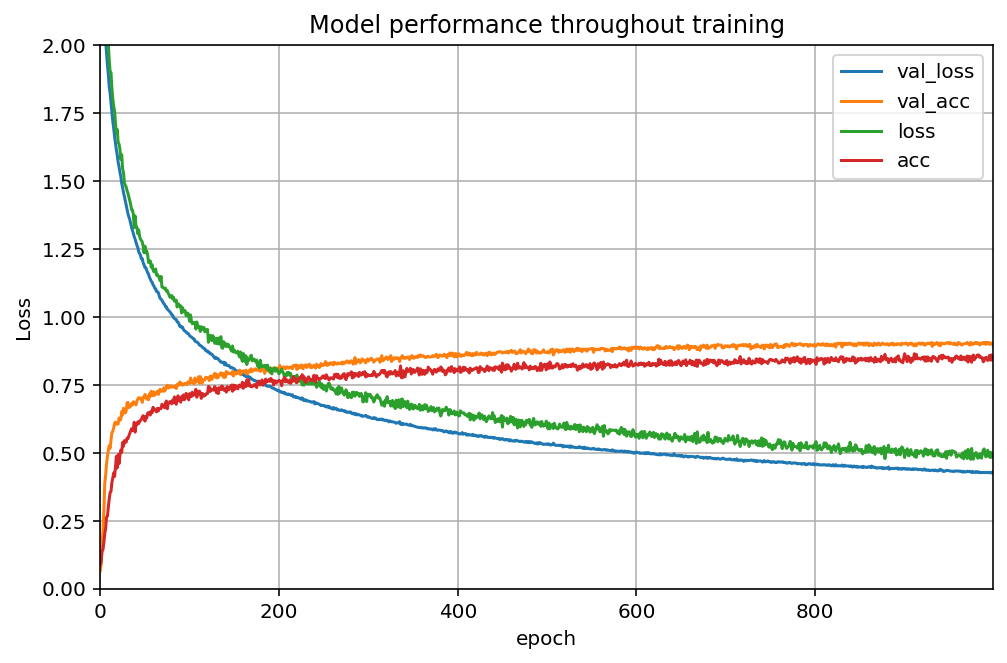

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylim(0,2)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Accuracy

In [34]:
y_train_predict = model_final.predict(new_X_train)
y_train_predict = np.argmax(y_train_predict, axis = 1)
y_train_predict =  np_utils.to_categorical(y_train_predict, num_classes=10, dtype='float32')
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

0.9169193450576106


In [35]:
y_test_predict = model_final.predict(new_X_test)
y_test_predict = np.argmax(y_test_predict, axis = 1)
y_test_predict =  np_utils.to_categorical(y_test_predict, num_classes=10, dtype='float32')
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.8934624697336562


## Prediction

In [36]:
import cv2
img2 = cv2.imread('prev1.jpg')
img2  = cv2.resize(img2,dsize=(64,64))
img2.shape

(64, 64, 3)

In [37]:
img2 = img2.reshape(1,img2.shape[0],img2.shape[1],img2.shape[2])
img2_predict0 = vggmodel.predict(img2)
img2_predict = model_final.predict(img2_predict0)

In [38]:
img2_predict = np.argmax(img2_predict, axis = 1)
img2_predict

array([8], dtype=int64)

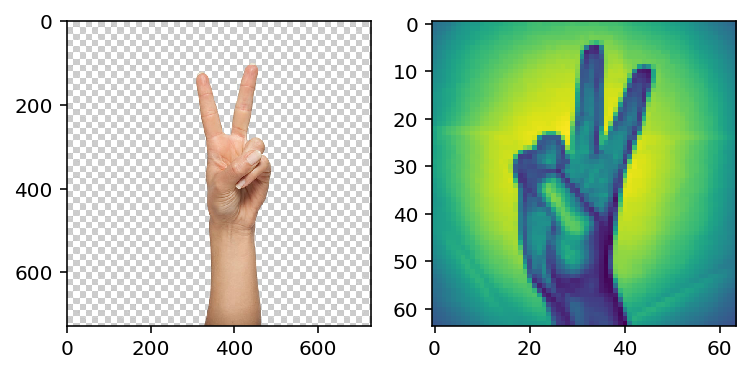

In [39]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[1].imshow(X[1649])

# Model with 2 Denses + 2 dropout

In [40]:
new_X_train = vggmodel.predict(X_train)
new_X_test = vggmodel.predict(X_test)

## Additional model

In [41]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras import optimizers

model_final = Sequential()
model_final.add(Flatten(input_shape=(2, 2, 512)))

model_final.add(Dropout(0.25))
model_final.add(Dense(50, activation="relu"))

model_final.add(Dropout(0.25))
model_final.add(Dense(10, activation="softmax"))

In [42]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                102450    
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 102,960
Trainable params: 102,960
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model_final.fit(x=new_X_train, y=y_train, epochs= 1500, validation_data= (new_X_test, y_test))

Train on 1649 samples, validate on 413 samples
Epoch 1/1500
1649/1649 [==============================] - 1s 433us/step - loss: 2.5606 - acc: 0.0946 - val_loss: 2.2809 - val_acc: 0.1598
Epoch 2/1500
1649/1649 [==============================] - 0s 122us/step - loss: 2.3385 - acc: 0.1255 - val_loss: 2.2396 - val_acc: 0.2349
Epoch 3/1500
1649/1649 [==============================] - 0s 113us/step - loss: 2.2890 - acc: 0.1407 - val_loss: 2.2291 - val_acc: 0.2518
Epoch 4/1500
1649/1649 [==============================] - 0s 112us/step - loss: 2.2764 - acc: 0.1504 - val_loss: 2.2075 - val_acc: 0.3099
Epoch 5/1500
1649/1649 [==============================] - 0s 110us/step - loss: 2.2449 - acc: 0.1625 - val_loss: 2.1918 - val_acc: 0.3075
Epoch 6/1500
1649/1649 [==============================] - 0s 103us/step - loss: 2.2171 - acc: 0.1716 - val_loss: 2.1738 - val_acc: 0.3390
Epoch 7/1500
1649/1649 [==============================] - 0s 106us/step - loss: 2.2060 - acc: 0.1831 - val_loss: 2.1424 - val

Epoch 60/1500
1649/1649 [==============================] - 0s 100us/step - loss: 1.3948 - acc: 0.5482 - val_loss: 1.2528 - val_acc: 0.6755
Epoch 61/1500
1649/1649 [==============================] - 0s 100us/step - loss: 1.3761 - acc: 0.5470 - val_loss: 1.2419 - val_acc: 0.6731
Epoch 62/1500
1649/1649 [==============================] - 0s 115us/step - loss: 1.3897 - acc: 0.5506 - val_loss: 1.2331 - val_acc: 0.6780
Epoch 63/1500
1649/1649 [==============================] - 0s 105us/step - loss: 1.3587 - acc: 0.5567 - val_loss: 1.2247 - val_acc: 0.6852
Epoch 64/1500
1649/1649 [==============================] - 0s 106us/step - loss: 1.3636 - acc: 0.5397 - val_loss: 1.2155 - val_acc: 0.6901
Epoch 65/1500
1649/1649 [==============================] - 0s 102us/step - loss: 1.3294 - acc: 0.5706 - val_loss: 1.2028 - val_acc: 0.6998
Epoch 66/1500
1649/1649 [==============================] - 0s 101us/step - loss: 1.3528 - acc: 0.5579 - val_loss: 1.1917 - val_acc: 0.6949
Epoch 67/1500
1649/1649 [==

1649/1649 [==============================] - 0s 107us/step - loss: 1.0180 - acc: 0.6834 - val_loss: 0.8659 - val_acc: 0.7942
Epoch 119/1500
1649/1649 [==============================] - 0s 112us/step - loss: 1.0432 - acc: 0.6519 - val_loss: 0.8638 - val_acc: 0.7893
Epoch 120/1500
1649/1649 [==============================] - 0s 101us/step - loss: 1.0101 - acc: 0.6756 - val_loss: 0.8591 - val_acc: 0.7869
Epoch 121/1500
1649/1649 [==============================] - 0s 101us/step - loss: 1.0285 - acc: 0.6640 - val_loss: 0.8589 - val_acc: 0.7772
Epoch 122/1500
1649/1649 [==============================] - 0s 101us/step - loss: 1.0064 - acc: 0.6798 - val_loss: 0.8492 - val_acc: 0.7893
Epoch 123/1500
1649/1649 [==============================] - 0s 107us/step - loss: 1.0252 - acc: 0.6634 - val_loss: 0.8462 - val_acc: 0.7966
Epoch 124/1500
1649/1649 [==============================] - 0s 110us/step - loss: 1.0112 - acc: 0.6689 - val_loss: 0.8451 - val_acc: 0.7845
Epoch 125/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 128us/step - loss: 0.8396 - acc: 0.7162 - val_loss: 0.6851 - val_acc: 0.8305
Epoch 177/1500
1649/1649 [==============================] - 0s 127us/step - loss: 0.8342 - acc: 0.7295 - val_loss: 0.6839 - val_acc: 0.8184
Epoch 178/1500
1649/1649 [==============================] - 0s 131us/step - loss: 0.8516 - acc: 0.7162 - val_loss: 0.6816 - val_acc: 0.8281
Epoch 179/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.8609 - acc: 0.7126 - val_loss: 0.6839 - val_acc: 0.8184
Epoch 180/1500
1649/1649 [==============================] - 0s 110us/step - loss: 0.8812 - acc: 0.7016 - val_loss: 0.6822 - val_acc: 0.8208
Epoch 181/1500
1649/1649 [==============================] - 0s 123us/step - loss: 0.8521 - acc: 0.7271 - val_loss: 0.6753 - val_acc: 0.8378
Epoch 182/1500
1649/1649 [==============================] - 0s 123us/step - loss: 0.8486 - acc: 0.7223 - val_loss: 0.6759 - val_acc: 0.8305
Epoch 183/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 125us/step - loss: 0.7483 - acc: 0.7580 - val_loss: 0.5869 - val_acc: 0.8475
Epoch 235/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.7493 - acc: 0.7520 - val_loss: 0.5839 - val_acc: 0.8499
Epoch 236/1500
1649/1649 [==============================] - ETA: 0s - loss: 0.7649 - acc: 0.749 - 0s 109us/step - loss: 0.7658 - acc: 0.7489 - val_loss: 0.5857 - val_acc: 0.8378
Epoch 237/1500
1649/1649 [==============================] - 0s 109us/step - loss: 0.7472 - acc: 0.7605 - val_loss: 0.5858 - val_acc: 0.8378
Epoch 238/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.7448 - acc: 0.7702 - val_loss: 0.5810 - val_acc: 0.8475
Epoch 239/1500
1649/1649 [==============================] - 0s 126us/step - loss: 0.7482 - acc: 0.7629 - val_loss: 0.5792 - val_acc: 0.8426
Epoch 240/1500
1649/1649 [==============================] - 0s 127us/step - loss: 0.7340 - acc: 0.7586 - val_loss: 0.5787 - val_acc: 0.84

1649/1649 [==============================] - 0s 116us/step - loss: 0.6671 - acc: 0.7696 - val_loss: 0.5152 - val_acc: 0.8620
Epoch 293/1500
1649/1649 [==============================] - 0s 132us/step - loss: 0.6699 - acc: 0.7835 - val_loss: 0.5123 - val_acc: 0.8571
Epoch 294/1500
1649/1649 [==============================] - 0s 128us/step - loss: 0.6835 - acc: 0.7677 - val_loss: 0.5147 - val_acc: 0.8523
Epoch 295/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.6701 - acc: 0.7932 - val_loss: 0.5116 - val_acc: 0.8571
Epoch 296/1500
1649/1649 [==============================] - 0s 117us/step - loss: 0.6827 - acc: 0.7702 - val_loss: 0.5166 - val_acc: 0.8499
Epoch 297/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.6727 - acc: 0.7623 - val_loss: 0.5130 - val_acc: 0.8547
Epoch 298/1500
1649/1649 [==============================] - 0s 128us/step - loss: 0.6756 - acc: 0.7793 - val_loss: 0.5145 - val_acc: 0.8571
Epoch 299/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 113us/step - loss: 0.6017 - acc: 0.8078 - val_loss: 0.4704 - val_acc: 0.8668
Epoch 351/1500
1649/1649 [==============================] - 0s 112us/step - loss: 0.6545 - acc: 0.7623 - val_loss: 0.4750 - val_acc: 0.8571
Epoch 352/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.6324 - acc: 0.7914 - val_loss: 0.4719 - val_acc: 0.8644
Epoch 353/1500
1649/1649 [==============================] - 0s 126us/step - loss: 0.6190 - acc: 0.7944 - val_loss: 0.4734 - val_acc: 0.8620
Epoch 354/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.6396 - acc: 0.7914 - val_loss: 0.4675 - val_acc: 0.8717
Epoch 355/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.5944 - acc: 0.8065 - val_loss: 0.4689 - val_acc: 0.8620
Epoch 356/1500
1649/1649 [==============================] - 0s 113us/step - loss: 0.6243 - acc: 0.7896 - val_loss: 0.4669 - val_acc: 0.8620
Epoch 357/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 113us/step - loss: 0.5615 - acc: 0.8181 - val_loss: 0.4384 - val_acc: 0.8668
Epoch 409/1500
1649/1649 [==============================] - 0s 112us/step - loss: 0.5677 - acc: 0.8114 - val_loss: 0.4326 - val_acc: 0.8741
Epoch 410/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.5947 - acc: 0.7920 - val_loss: 0.4398 - val_acc: 0.8644
Epoch 411/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.6032 - acc: 0.7968 - val_loss: 0.4373 - val_acc: 0.8814
Epoch 412/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.5779 - acc: 0.8017 - val_loss: 0.4356 - val_acc: 0.8644
Epoch 413/1500
1649/1649 [==============================] - 0s 114us/step - loss: 0.5631 - acc: 0.8120 - val_loss: 0.4355 - val_acc: 0.8692
Epoch 414/1500
1649/1649 [==============================] - 0s 112us/step - loss: 0.6019 - acc: 0.7956 - val_loss: 0.4331 - val_acc: 0.8692
Epoch 415/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 118us/step - loss: 0.5582 - acc: 0.8175 - val_loss: 0.4087 - val_acc: 0.8838
Epoch 467/1500
1649/1649 [==============================] - 0s 111us/step - loss: 0.5542 - acc: 0.8205 - val_loss: 0.4050 - val_acc: 0.8886
Epoch 468/1500
1649/1649 [==============================] - 0s 112us/step - loss: 0.5552 - acc: 0.8126 - val_loss: 0.4062 - val_acc: 0.8886
Epoch 469/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.5544 - acc: 0.8229 - val_loss: 0.4065 - val_acc: 0.8862
Epoch 470/1500
1649/1649 [==============================] - 0s 113us/step - loss: 0.5357 - acc: 0.8217 - val_loss: 0.4035 - val_acc: 0.8862
Epoch 471/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.5567 - acc: 0.8126 - val_loss: 0.4100 - val_acc: 0.8789
Epoch 472/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.5288 - acc: 0.8235 - val_loss: 0.4081 - val_acc: 0.8862
Epoch 473/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 113us/step - loss: 0.5300 - acc: 0.8241 - val_loss: 0.3867 - val_acc: 0.8910
Epoch 525/1500
1649/1649 [==============================] - 0s 112us/step - loss: 0.5188 - acc: 0.8193 - val_loss: 0.3866 - val_acc: 0.8910
Epoch 526/1500
1649/1649 [==============================] - 0s 112us/step - loss: 0.5192 - acc: 0.8114 - val_loss: 0.3846 - val_acc: 0.8935
Epoch 527/1500
1649/1649 [==============================] - 0s 133us/step - loss: 0.5293 - acc: 0.8235 - val_loss: 0.3847 - val_acc: 0.8910
Epoch 528/1500
1649/1649 [==============================] - 0s 111us/step - loss: 0.5277 - acc: 0.8247 - val_loss: 0.3860 - val_acc: 0.8935
Epoch 529/1500
1649/1649 [==============================] - 0s 112us/step - loss: 0.5312 - acc: 0.8163 - val_loss: 0.3845 - val_acc: 0.8935
Epoch 530/1500
1649/1649 [==============================] - 0s 113us/step - loss: 0.4999 - acc: 0.8369 - val_loss: 0.3859 - val_acc: 0.8959
Epoch 531/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 127us/step - loss: 0.4975 - acc: 0.8375 - val_loss: 0.3669 - val_acc: 0.8959
Epoch 583/1500
1649/1649 [==============================] - 0s 135us/step - loss: 0.4800 - acc: 0.8435 - val_loss: 0.3639 - val_acc: 0.9031
Epoch 584/1500
1649/1649 [==============================] - 0s 128us/step - loss: 0.4977 - acc: 0.8296 - val_loss: 0.3619 - val_acc: 0.9007
Epoch 585/1500
1649/1649 [==============================] - 0s 120us/step - loss: 0.4883 - acc: 0.8417 - val_loss: 0.3629 - val_acc: 0.8983
Epoch 586/1500
1649/1649 [==============================] - 0s 120us/step - loss: 0.4925 - acc: 0.8338 - val_loss: 0.3645 - val_acc: 0.9007
Epoch 587/1500
1649/1649 [==============================] - 0s 127us/step - loss: 0.4897 - acc: 0.8399 - val_loss: 0.3656 - val_acc: 0.8983
Epoch 588/1500
1649/1649 [==============================] - 0s 135us/step - loss: 0.5036 - acc: 0.8344 - val_loss: 0.3644 - val_acc: 0.9031
Epoch 589/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 118us/step - loss: 0.4770 - acc: 0.8448 - val_loss: 0.3469 - val_acc: 0.9104
Epoch 641/1500
1649/1649 [==============================] - 0s 113us/step - loss: 0.4662 - acc: 0.8441 - val_loss: 0.3513 - val_acc: 0.9056
Epoch 642/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.4818 - acc: 0.8441 - val_loss: 0.3497 - val_acc: 0.8959
Epoch 643/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.4877 - acc: 0.8314 - val_loss: 0.3488 - val_acc: 0.8983
Epoch 644/1500
1649/1649 [==============================] - 0s 125us/step - loss: 0.4568 - acc: 0.8508 - val_loss: 0.3479 - val_acc: 0.8983
Epoch 645/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.4798 - acc: 0.8423 - val_loss: 0.3467 - val_acc: 0.9007
Epoch 646/1500
1649/1649 [==============================] - 0s 112us/step - loss: 0.4612 - acc: 0.8490 - val_loss: 0.3465 - val_acc: 0.9031
Epoch 647/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 116us/step - loss: 0.4586 - acc: 0.8448 - val_loss: 0.3368 - val_acc: 0.9056
Epoch 699/1500
1649/1649 [==============================] - 0s 117us/step - loss: 0.4560 - acc: 0.8557 - val_loss: 0.3357 - val_acc: 0.9056
Epoch 700/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.4391 - acc: 0.8569 - val_loss: 0.3341 - val_acc: 0.9007
Epoch 701/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.4654 - acc: 0.8514 - val_loss: 0.3353 - val_acc: 0.9031
Epoch 702/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.4699 - acc: 0.8399 - val_loss: 0.3364 - val_acc: 0.8983
Epoch 703/1500
1649/1649 [==============================] - 0s 113us/step - loss: 0.4460 - acc: 0.8472 - val_loss: 0.3362 - val_acc: 0.9007
Epoch 704/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.4704 - acc: 0.8290 - val_loss: 0.3368 - val_acc: 0.8983
Epoch 705/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 130us/step - loss: 0.4258 - acc: 0.8623 - val_loss: 0.3214 - val_acc: 0.9080
Epoch 757/1500
1649/1649 [==============================] - 0s 120us/step - loss: 0.4222 - acc: 0.8587 - val_loss: 0.3214 - val_acc: 0.9031
Epoch 758/1500
1649/1649 [==============================] - 0s 123us/step - loss: 0.4396 - acc: 0.8581 - val_loss: 0.3246 - val_acc: 0.8959
Epoch 759/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.4271 - acc: 0.8636 - val_loss: 0.3234 - val_acc: 0.8983
Epoch 760/1500
1649/1649 [==============================] - 0s 126us/step - loss: 0.4292 - acc: 0.8593 - val_loss: 0.3208 - val_acc: 0.9031
Epoch 761/1500
1649/1649 [==============================] - 0s 126us/step - loss: 0.4280 - acc: 0.8617 - val_loss: 0.3234 - val_acc: 0.9007
Epoch 762/1500
1649/1649 [==============================] - 0s 122us/step - loss: 0.4298 - acc: 0.8557 - val_loss: 0.3213 - val_acc: 0.9007
Epoch 763/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 118us/step - loss: 0.4141 - acc: 0.8678 - val_loss: 0.3154 - val_acc: 0.9007
Epoch 815/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.4192 - acc: 0.8557 - val_loss: 0.3139 - val_acc: 0.9104
Epoch 816/1500
1649/1649 [==============================] - 0s 136us/step - loss: 0.4222 - acc: 0.8605 - val_loss: 0.3140 - val_acc: 0.9080
Epoch 817/1500
1649/1649 [==============================] - 0s 135us/step - loss: 0.4317 - acc: 0.8490 - val_loss: 0.3138 - val_acc: 0.9080
Epoch 818/1500
1649/1649 [==============================] - 0s 130us/step - loss: 0.4229 - acc: 0.8599 - val_loss: 0.3139 - val_acc: 0.9031
Epoch 819/1500
1649/1649 [==============================] - 0s 130us/step - loss: 0.4230 - acc: 0.8569 - val_loss: 0.3119 - val_acc: 0.9031
Epoch 820/1500
1649/1649 [==============================] - 0s 136us/step - loss: 0.4472 - acc: 0.8478 - val_loss: 0.3118 - val_acc: 0.9080
Epoch 821/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 115us/step - loss: 0.4043 - acc: 0.8714 - val_loss: 0.3024 - val_acc: 0.9128
Epoch 873/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.4110 - acc: 0.8575 - val_loss: 0.3050 - val_acc: 0.9177
Epoch 874/1500
1649/1649 [==============================] - 0s 124us/step - loss: 0.4175 - acc: 0.8569 - val_loss: 0.3037 - val_acc: 0.9104
Epoch 875/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.3974 - acc: 0.8690 - val_loss: 0.3019 - val_acc: 0.9104
Epoch 876/1500
1649/1649 [==============================] - 0s 120us/step - loss: 0.4205 - acc: 0.8648 - val_loss: 0.3038 - val_acc: 0.9080
Epoch 877/1500
1649/1649 [==============================] - 0s 113us/step - loss: 0.4126 - acc: 0.8587 - val_loss: 0.3018 - val_acc: 0.9080
Epoch 878/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.3936 - acc: 0.8745 - val_loss: 0.3035 - val_acc: 0.9080
Epoch 879/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 117us/step - loss: 0.4176 - acc: 0.8593 - val_loss: 0.2946 - val_acc: 0.9153
Epoch 931/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.3967 - acc: 0.8739 - val_loss: 0.2972 - val_acc: 0.9104
Epoch 932/1500
1649/1649 [==============================] - 0s 143us/step - loss: 0.4128 - acc: 0.8660 - val_loss: 0.2974 - val_acc: 0.9056
Epoch 933/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.4006 - acc: 0.8720 - val_loss: 0.2931 - val_acc: 0.9128
Epoch 934/1500
1649/1649 [==============================] - 0s 113us/step - loss: 0.3982 - acc: 0.8611 - val_loss: 0.2944 - val_acc: 0.9080
Epoch 935/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.4105 - acc: 0.8587 - val_loss: 0.2944 - val_acc: 0.9104
Epoch 936/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.4110 - acc: 0.8654 - val_loss: 0.2957 - val_acc: 0.9104
Epoch 937/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 114us/step - loss: 0.3856 - acc: 0.8763 - val_loss: 0.2851 - val_acc: 0.9128
Epoch 989/1500
1649/1649 [==============================] - 0s 114us/step - loss: 0.4013 - acc: 0.8593 - val_loss: 0.2862 - val_acc: 0.9153
Epoch 990/1500
1649/1649 [==============================] - 0s 125us/step - loss: 0.3820 - acc: 0.8757 - val_loss: 0.2852 - val_acc: 0.9153
Epoch 991/1500
1649/1649 [==============================] - 0s 238us/step - loss: 0.3974 - acc: 0.8629 - val_loss: 0.2879 - val_acc: 0.9177
Epoch 992/1500
1649/1649 [==============================] - 0s 131us/step - loss: 0.3831 - acc: 0.8739 - val_loss: 0.2919 - val_acc: 0.9201
Epoch 993/1500
1649/1649 [==============================] - 0s 139us/step - loss: 0.3943 - acc: 0.8696 - val_loss: 0.2858 - val_acc: 0.9128
Epoch 994/1500
1649/1649 [==============================] - 0s 127us/step - loss: 0.3957 - acc: 0.8611 - val_loss: 0.2875 - val_acc: 0.9104
Epoch 995/1500
1649/1649 [=========

1649/1649 [==============================] - ETA: 0s - loss: 0.3542 - acc: 0.882 - 0s 119us/step - loss: 0.3613 - acc: 0.8793 - val_loss: 0.2801 - val_acc: 0.9128
Epoch 1047/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.3714 - acc: 0.8769 - val_loss: 0.2788 - val_acc: 0.9153
Epoch 1048/1500
1649/1649 [==============================] - 0s 127us/step - loss: 0.3749 - acc: 0.8739 - val_loss: 0.2760 - val_acc: 0.9201
Epoch 1049/1500
1649/1649 [==============================] - 0s 114us/step - loss: 0.3818 - acc: 0.8763 - val_loss: 0.2798 - val_acc: 0.9177
Epoch 1050/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.3693 - acc: 0.8763 - val_loss: 0.2783 - val_acc: 0.9177
Epoch 1051/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.3787 - acc: 0.8678 - val_loss: 0.2791 - val_acc: 0.9201
Epoch 1052/1500
1649/1649 [==============================] - 0s 117us/step - loss: 0.3839 - acc: 0.8702 - val_loss: 0.2806 - val_acc

Epoch 1104/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.3750 - acc: 0.8727 - val_loss: 0.2752 - val_acc: 0.9201
Epoch 1105/1500
1649/1649 [==============================] - 0s 124us/step - loss: 0.3593 - acc: 0.8799 - val_loss: 0.2728 - val_acc: 0.9225
Epoch 1106/1500
1649/1649 [==============================] - 0s 128us/step - loss: 0.3573 - acc: 0.8781 - val_loss: 0.2713 - val_acc: 0.9201
Epoch 1107/1500
1649/1649 [==============================] - 0s 136us/step - loss: 0.3541 - acc: 0.8799 - val_loss: 0.2729 - val_acc: 0.9177
Epoch 1108/1500
1649/1649 [==============================] - 0s 127us/step - loss: 0.3651 - acc: 0.8787 - val_loss: 0.2708 - val_acc: 0.9153
Epoch 1109/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.3531 - acc: 0.8854 - val_loss: 0.2729 - val_acc: 0.9177
Epoch 1110/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.3542 - acc: 0.8781 - val_loss: 0.2706 - val_acc: 0.9153
Epoch 1111/15

1649/1649 [==============================] - 0s 113us/step - loss: 0.3487 - acc: 0.8884 - val_loss: 0.2657 - val_acc: 0.9225
Epoch 1163/1500
1649/1649 [==============================] - 0s 112us/step - loss: 0.3560 - acc: 0.8781 - val_loss: 0.2650 - val_acc: 0.9225
Epoch 1164/1500
1649/1649 [==============================] - 0s 104us/step - loss: 0.3515 - acc: 0.8751 - val_loss: 0.2639 - val_acc: 0.9225
Epoch 1165/1500
1649/1649 [==============================] - 0s 107us/step - loss: 0.3672 - acc: 0.8708 - val_loss: 0.2638 - val_acc: 0.9201
Epoch 1166/1500
1649/1649 [==============================] - 0s 112us/step - loss: 0.3505 - acc: 0.8817 - val_loss: 0.2684 - val_acc: 0.9225
Epoch 1167/1500
1649/1649 [==============================] - 0s 113us/step - loss: 0.3460 - acc: 0.8878 - val_loss: 0.2667 - val_acc: 0.9153
Epoch 1168/1500
1649/1649 [==============================] - 0s 108us/step - loss: 0.3704 - acc: 0.8811 - val_loss: 0.2682 - val_acc: 0.9225
Epoch 1169/1500
1649/1649 [==

1649/1649 [==============================] - 0s 220us/step - loss: 0.3503 - acc: 0.8836 - val_loss: 0.2581 - val_acc: 0.9249
Epoch 1221/1500
1649/1649 [==============================] - 0s 192us/step - loss: 0.3577 - acc: 0.8769 - val_loss: 0.2602 - val_acc: 0.9274
Epoch 1222/1500
1649/1649 [==============================] - 0s 198us/step - loss: 0.3474 - acc: 0.8787 - val_loss: 0.2605 - val_acc: 0.9201
Epoch 1223/1500
1649/1649 [==============================] - 0s 187us/step - loss: 0.3454 - acc: 0.8854 - val_loss: 0.2612 - val_acc: 0.9177
Epoch 1224/1500
1649/1649 [==============================] - 0s 190us/step - loss: 0.3386 - acc: 0.8908 - val_loss: 0.2580 - val_acc: 0.9225
Epoch 1225/1500
1649/1649 [==============================] - 0s 155us/step - loss: 0.3534 - acc: 0.8799 - val_loss: 0.2596 - val_acc: 0.9225
Epoch 1226/1500
1649/1649 [==============================] - 0s 150us/step - loss: 0.3385 - acc: 0.8775 - val_loss: 0.2578 - val_acc: 0.9225
Epoch 1227/1500
1649/1649 [==

Epoch 1278/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.3627 - acc: 0.8672 - val_loss: 0.2575 - val_acc: 0.9249
Epoch 1279/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.3397 - acc: 0.8914 - val_loss: 0.2570 - val_acc: 0.9225
Epoch 1280/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.3415 - acc: 0.8775 - val_loss: 0.2539 - val_acc: 0.9225
Epoch 1281/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.3417 - acc: 0.8914 - val_loss: 0.2565 - val_acc: 0.9274
Epoch 1282/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.3385 - acc: 0.8963 - val_loss: 0.2550 - val_acc: 0.9274
Epoch 1283/1500
1649/1649 [==============================] - 0s 114us/step - loss: 0.3569 - acc: 0.8763 - val_loss: 0.2559 - val_acc: 0.9225
Epoch 1284/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.3356 - acc: 0.8842 - val_loss: 0.2572 - val_acc: 0.9274
Epoch 1285/15

1649/1649 [==============================] - 0s 134us/step - loss: 0.3329 - acc: 0.8793 - val_loss: 0.2483 - val_acc: 0.9274
Epoch 1337/1500
1649/1649 [==============================] - 0s 162us/step - loss: 0.3336 - acc: 0.8799 - val_loss: 0.2495 - val_acc: 0.9274
Epoch 1338/1500
1649/1649 [==============================] - 0s 143us/step - loss: 0.3216 - acc: 0.8902 - val_loss: 0.2501 - val_acc: 0.9249
Epoch 1339/1500
1649/1649 [==============================] - 0s 167us/step - loss: 0.3273 - acc: 0.8830 - val_loss: 0.2520 - val_acc: 0.9249
Epoch 1340/1500
1649/1649 [==============================] - 0s 149us/step - loss: 0.3292 - acc: 0.8890 - val_loss: 0.2520 - val_acc: 0.9249
Epoch 1341/1500
1649/1649 [==============================] - 0s 155us/step - loss: 0.3389 - acc: 0.8799 - val_loss: 0.2512 - val_acc: 0.9201
Epoch 1342/1500
1649/1649 [==============================] - 0s 144us/step - loss: 0.3115 - acc: 0.9018 - val_loss: 0.2535 - val_acc: 0.9201
Epoch 1343/1500
1649/1649 [==

1649/1649 [==============================] - 0s 141us/step - loss: 0.3361 - acc: 0.8866 - val_loss: 0.2488 - val_acc: 0.9249
Epoch 1395/1500
1649/1649 [==============================] - 0s 131us/step - loss: 0.3391 - acc: 0.8830 - val_loss: 0.2460 - val_acc: 0.9274
Epoch 1396/1500
1649/1649 [==============================] - 0s 113us/step - loss: 0.3328 - acc: 0.8878 - val_loss: 0.2464 - val_acc: 0.9249
Epoch 1397/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.3094 - acc: 0.9048 - val_loss: 0.2477 - val_acc: 0.9225
Epoch 1398/1500
1649/1649 [==============================] - 0s 129us/step - loss: 0.3265 - acc: 0.8884 - val_loss: 0.2482 - val_acc: 0.9298
Epoch 1399/1500
1649/1649 [==============================] - 0s 136us/step - loss: 0.3355 - acc: 0.8927 - val_loss: 0.2467 - val_acc: 0.9274
Epoch 1400/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.3144 - acc: 0.9012 - val_loss: 0.2442 - val_acc: 0.9274
Epoch 1401/1500
1649/1649 [==

1649/1649 [==============================] - 0s 110us/step - loss: 0.3127 - acc: 0.8969 - val_loss: 0.2413 - val_acc: 0.9274
Epoch 1453/1500
1649/1649 [==============================] - 0s 110us/step - loss: 0.3077 - acc: 0.9084 - val_loss: 0.2440 - val_acc: 0.9225
Epoch 1454/1500
1649/1649 [==============================] - 0s 140us/step - loss: 0.3147 - acc: 0.8914 - val_loss: 0.2423 - val_acc: 0.9274
Epoch 1455/1500
1649/1649 [==============================] - 0s 112us/step - loss: 0.3073 - acc: 0.9005 - val_loss: 0.2459 - val_acc: 0.9298
Epoch 1456/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.3245 - acc: 0.8902 - val_loss: 0.2450 - val_acc: 0.9274
Epoch 1457/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.3084 - acc: 0.9036 - val_loss: 0.2419 - val_acc: 0.9225
Epoch 1458/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.3283 - acc: 0.8848 - val_loss: 0.2447 - val_acc: 0.9274
Epoch 1459/1500
1649/1649 [==

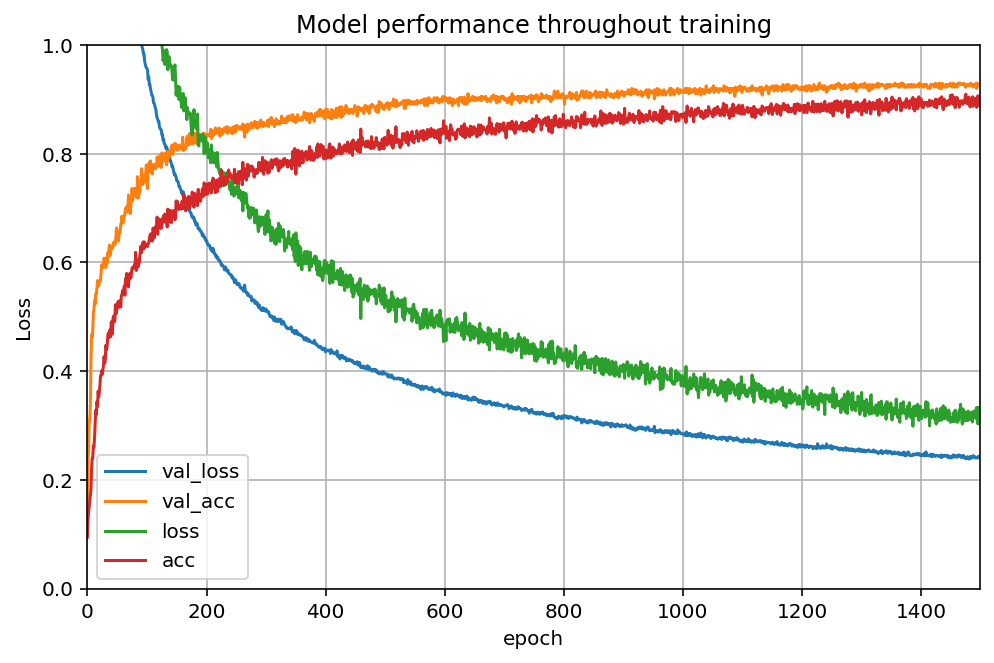

In [44]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Accuracy

In [45]:
y_train_predict = model_final.predict(new_X_train)
y_train_predict = np.argmax(y_train_predict, axis = 1)
y_train_predict =  np_utils.to_categorical(y_train_predict, num_classes=10, dtype='float32')
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

0.9624014554275319


In [46]:
y_test_predict = model_final.predict(new_X_test)
y_test_predict = np.argmax(y_test_predict, axis = 1)
y_test_predict =  np_utils.to_categorical(y_test_predict, num_classes=10, dtype='float32')
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.9249394673123487


## Prediction

In [47]:
import cv2
img2 = cv2.imread('prev1.jpg')
img2  = cv2.resize(img2,dsize=(64,64))
img2.shape

(64, 64, 3)

In [48]:
img2 = img2.reshape(1,img2.shape[0],img2.shape[1],img2.shape[2])
img2_predict0 = vggmodel.predict(img2)
img2_predict = model_final.predict(img2_predict0)

In [49]:
img2_predict = np.argmax(img2_predict, axis = 1)
img2_predict

array([4], dtype=int64)

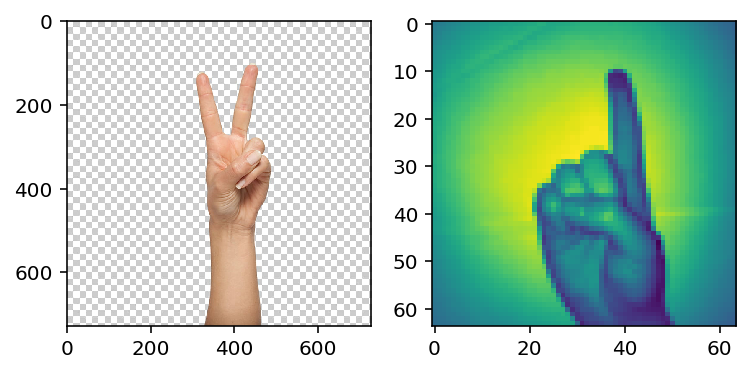

In [55]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[1].imshow(X[822])